<a href="https://colab.research.google.com/github/tylee33/DLforFinance/blob/master/S%26P500_%ED%8C%A9%ED%84%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%88%98%EC%A7%91%EA%B3%BC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## FinanceDataReader 설치 (for 구글 Colab)

!pip install -q finance-datareader

In [0]:
import FinanceDataReader as fdr
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [0]:
# matplotlib 컬러맵 생성
import matplotlib as mpl
import numpy as np

def make_colors(n, colormap=plt.cm.Spectral):
    return colormap(np.linspace(0.1, 1.0, n))

def make_explode(n):
    explodes = np.zeros(n)
    explodes[0] = 0.15
    return explodes

# S&P 500 종목 리스트

In [5]:
import FinanceDataReader as fdr

sp500 = fdr.StockListing('S&P500')
sp500.head(10)

,Symbol,Name,Sector,Industry
0,MMM,3M Company,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
6,ADBE,Adobe Systems Inc,Information Technology,Application Software
7,AMD,Advanced Micro Devices Inc,Information Technology,Semiconductors
8,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
9,AES,AES Corp,Utilities,Independent Power Producers & Energy Traders


In [6]:
len(sp500)

505

팩터 데이터 - finviz.com
EPS, P/E 등 72개 factor
https://finviz.com/quote.ashx?t=AAPL

In [15]:
import pandas as pd

url = 'https://finviz.com/quote.ashx?t=AAPL'
df = pd.read_html(url)[7]
df.columns = ['key', 'value'] * 6
df

,key,value,key,value,key,value,key,value,key,value,key,value
0,Index,DJIA S&P500,P/E,16.35,EPS (ttm),11.94,Insider Own,0.08%,Shs Outstand,4.74B,Perf Week,6.18%
1,Market Cap,923.91B,Forward P/E,15.30,EPS next Y,12.75,Insider Trans,-6.04%,Shs Float,4.68B,Perf Month,13.40%
2,Income,58.33B,PEG,1.26,EPS next Q,2.37,Inst Own,61.00%,Short Float,2.07%,Perf Quarter,17.47%
3,Sales,261.61B,P/S,3.53,EPS this Y,32.60%,Inst Trans,-0.74%,Short Ratio,2.89,Perf Half Y,-10.61%
4,Book/sh,24.89,P/B,7.84,EPS next Y,11.87%,ROA,16.30%,Target Price,180.05,Perf Year,11.33%
5,Cash/sh,18.25,P/C,10.69,EPS next 5Y,13.00%,ROE,50.90%,52W Range,142.00 - 233.47,Perf YTD,23.68%
6,Dividend,2.92,P/FCF,19.24,EPS past 5Y,16.50%,ROI,26.60%,52W High,-16.44%,Beta,1.12
7,Dividend %,1.50%,Quick Ratio,1.30,Sales past 5Y,9.20%,Gross Margin,38.20%,52W Low,37.39%,ATR,3.23
8,Employees,132000,Current Ratio,1.30,Sales Q/Q,-4.50%,Oper. Margin,26.00%,RSI (14),82.93,Volatility,2.20% 1.56%
9,Optionable,Yes,Debt/Eq,0.97,EPS Q/Q,-4.80%,Profit Margin,22.70%,Rel Volume,1.49,Prev Close,188.16


# 컬럼을 행으로 만들기

In [20]:
df_list = [df.iloc[:, i*2: i*2+2] for i in range(6)]
df_factor = pd.concat(df_list, ignore_index=True)

df_factor.set_index('key', inplace=True)
df_factor.head(20)

,value
key,
Index,DJIA S&P500
Market Cap,923.91B
Income,58.33B
Sales,261.61B
Book/sh,24.89
Cash/sh,18.25
Dividend,2.92
Dividend %,1.50%
Employees,132000


In [21]:
df_factor.tail(10)

,value
key,
Perf Quarter,17.47%
Perf Half Y,-10.61%
Perf Year,11.33%
Perf YTD,23.68%
Beta,1.12
ATR,3.23
Volatility,2.20% 1.56%
Prev Close,188.16
Price,195.09


In [22]:
len(df_factor)

72

# 주요 팩터

*   Market Cap
*   Dividend Yield
*   PER
*   PBR
*   ROE
*   Beta





In [23]:
v = df_factor.value

marcap = v['Market Cap']
dividend = v['Dividend %']
per = v['P/E']
pbr = v['P/B']
beta = v['Beta']
roe = v['ROE']

marcap, dividend, per, pbr, beta, roe 

('923.91B', '1.50%', '16.35', '7.84', '1.12', '50.90%')

# 데이터 전처리

1.   단위(B, M, K) 수치값으로 변환
2.   '%' 삭제
3.   float 타입 변환



In [0]:
import re

def _conv_to_float(s):
    if s[-1] == '%':
        s = s.replace('%', '')
    if s[-1] in list('BMK'):
        powers = {'B': 10 ** 9, 'M': 10 ** 6, 'K': 10 ** 3, '': 1}
        m = re.search("([0-9\.]+)(M|B|K|)", s)
        if m:
            val, mag = m.group(1), m.group(2)
            return float(val) * powers[mag]
    try:
        result = float(s)
    except:
        result = None
    return result

In [25]:
marcap = _conv_to_float(marcap)
dividend = _conv_to_float(dividend)
per = _conv_to_float(per)
pbr = _conv_to_float(pbr)
beta = _conv_to_float(beta)
roe = _conv_to_float(roe)

marcap, dividend, per, pbr, beta, roe  

(923910000000.0, 1.5, 16.35, 7.84, 1.12, 50.9)

# 팩터 크롤링, 함수로 정리하기

In [0]:
import pandas as pd
import re

## 데이터 전처리 변환
def _conv_to_float(s):
    if s[-1] == '%':
        s = s.replace('%', '')
    if s[-1] in list('BMK'):
        powers = {'B': 10 ** 9, 'M': 10 ** 6, 'K': 10 ** 3, '': 1}
        m = re.search("([0-9\.]+)(M|B|K|)", s)
        if m:
            val, mag = m.group(1), m.group(2)
            return float(val) * powers[mag]
    try:
        result = float(s)
    except:
        result = None
    return result

def stock_factors(sym):
    url = 'https://finviz.com/quote.ashx?t=' + sym
    df = pd.read_html(url)[7]
    df.columns = ['key', 'value'] * 6

    ## 컬럼을 행으로 만들기
    df_list = [df.iloc[:, i*2: i*2+2] for i in range(6)]
    df_factor = pd.concat(df_list, ignore_index=True)
    df_factor.set_index('key', inplace=True)

    v = df_factor.value
    marcap = _conv_to_float(v['Market Cap'])
    dividend = _conv_to_float(v['Dividend %'])
    per = _conv_to_float(v['P/E'])
    pbr = _conv_to_float(v['P/B'])
    beta = _conv_to_float(v['Beta'])
    roe = _conv_to_float(v['ROE'])

    return {'MarCap':marcap, 'Dividend':dividend, 'PER':per, 'PBR':pbr, 'Beta':beta, 'ROE':roe}

In [31]:
stock_factors('AAPL')

{'Beta': 1.12,
 'Dividend': 1.5,
 'MarCap': 923910000000.0,
 'PBR': 7.84,
 'PER': 16.35,
 'ROE': 50.9}

In [32]:
stock_factors('NFLX')

{'Beta': 1.38,
 'Dividend': None,
 'MarCap': 163770000000.0,
 'PBR': 31.49,
 'PER': 144.23,
 'ROE': 25.8}

# 전종목 팩터 데이터 수집과 저장(JSON)

In [0]:
# 디렉토리가 없으면 생성
import os

folder = "sp500_factors/"

if not os.path.isdir(folder):
    os.mkdir(folder)

In [34]:
import json
import pandas as pd

re_map_sym = {'BRKB': 'BRK-B', 'BR': 'BRK-A', 'BFB':'BF-B'}

for ix, row in sp500.iterrows():
    sym, name = row['Symbol'], row['Name']
    json_fn = folder + '%s.json' % (sym)
    if os.path.exists(json_fn):
        print('skip', json_fn)
        continue

    if sym in re_map_sym:
        sym = re_map_sym[sym]
    factors = stock_factors(sym)
    with open(json_fn, 'w') as f:
        json.dump(factors, f)
    print(sym, name)

MMM 3M Company
ABT Abbott Laboratories
ABBV AbbVie Inc.
ABMD ABIOMED Inc
ACN Accenture plc
ATVI Activision Blizzard
ADBE Adobe Systems Inc
AMD Advanced Micro Devices Inc
AAP Advance Auto Parts
AES AES Corp
AMG Affiliated Managers Group Inc
AFL AFLAC Inc
A Agilent Technologies Inc
APD Air Products & Chemicals Inc
AKAM Akamai Technologies Inc
ALK Alaska Air Group Inc
ALB Albemarle Corp
ARE Alexandria Real Estate Equities
ALXN Alexion Pharmaceuticals
ALGN Align Technology
ALLE Allegion
AGN Allergan, Plc
ADS Alliance Data Systems
LNT Alliant Energy Corp
ALL Allstate Corp
GOOGL Alphabet Inc Class A
GOOG Alphabet Inc Class C
MO Altria Group Inc
AMZN Amazon.com Inc.
AEE Ameren Corp
AAL American Airlines Group
AEP American Electric Power
AXP American Express Co
AIG American International Group
AMT American Tower Corp.
AWK American Water Works Company Inc
AMP Ameriprise Financial
ABC AmerisourceBergen Corp
AME AMETEK Inc.
AMGN Amgen Inc.
APH Amphenol Corp
APC Anadarko Petroleum Corp
ADI Analog 

In [0]:
# JSON 팩터 데이터 읽기
for ix, row in sp500.iterrows():
    sym, name = row['Symbol'], row['Name']
    json_fn = folder + '%s.json' % (sym)

    with open(json_fn, 'r') as f:
        factors = json.load(f)
        
        for f in ['MarCap', 'Dividend', 'PER', 'PBR', 'Beta', 'ROE']:
            sp500.loc[ix,f] = factors[f]

In [36]:
sp500.head(20)

,Symbol,Name,Sector,Industry,MarCap,Dividend,PER,PBR,Beta,ROE
0,MMM,3M Company,Industrials,Industrial Conglomerates,121720000000.00,2.75,22.80,12.43,1.04,51.70
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,140980000000.00,1.60,57.51,4.62,1.13,7.70
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,120320000000.00,5.27,22.42,nan,1.15,-202.20
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,14860000000.00,nan,70.39,17.85,0.36,29.00
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,106230000000.00,1.74,24.80,8.48,1.11,39.60
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,37180000000.00,0.76,24.51,3.27,0.82,17.20
6,ADBE,Adobe Systems Inc,Information Technology,Application Software,134540000000.00,nan,47.34,13.78,1.10,27.20
7,AMD,Advanced Micro Devices Inc,Information Technology,Semiconductors,27890000000.00,nan,86.88,21.96,3.39,33.80
8,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,12340000000.00,0.14,29.90,3.48,0.99,11.80
9,AES,AES Corp,Utilities,Independent Power Producers & Energy Traders,12160000000.00,3.01,11.86,3.79,1.08,37.00


# 섹터별 종목수

In [37]:
sector_count = sp500.groupby('Sector')['Symbol'].count().sort_values(ascending=False)
sector_count

Sector
Industrials               70
Financials                70
Information Technology    66
Consumer Discretionary    64
Health Care               62
Consumer Staples          33
Real Estate               31
Energy                    29
Utilities                 28
Materials                 26
Communication Services    26
Name: Symbol, dtype: int64

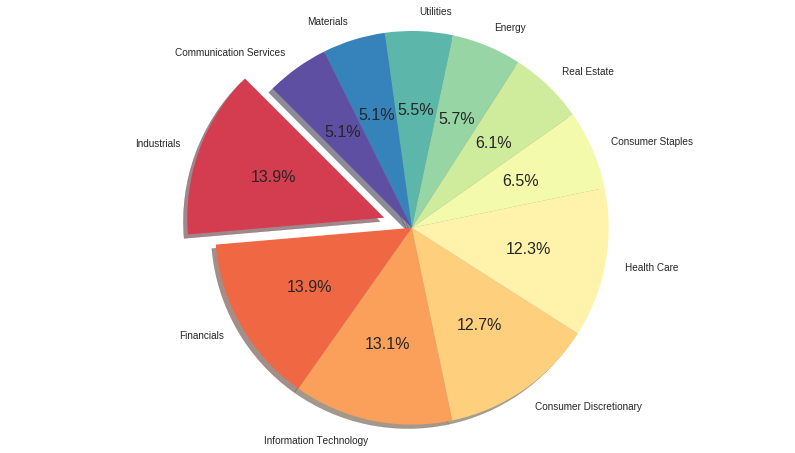

In [38]:
# sector_count 섹터별 종목수
values = sector_count.values
labels = sector_count.index

n = len(labels)
plt.pie(values, labels=labels, colors=make_colors(n), explode=make_explode(n), autopct='%1.1f%%', shadow=True, startangle=135)
plt.axis('equal')
plt.show()

# 섹터별 시가총액

In [39]:
sector_marcap = sp500.groupby('Sector')['MarCap'].sum().sort_values(ascending=False)
sector_marcap

Sector
Information Technology   5215300000000.00
Financials               3855020000000.00
Health Care              3577560000000.00
Communication Services   3528390000000.00
Consumer Discretionary   2642080000000.00
Industrials              2364120000000.00
Consumer Staples         1996650000000.00
Energy                   1340490000000.00
Utilities                 785580000000.00
Real Estate               718550000000.00
Materials                 666890000000.00
Name: MarCap, dtype: float64

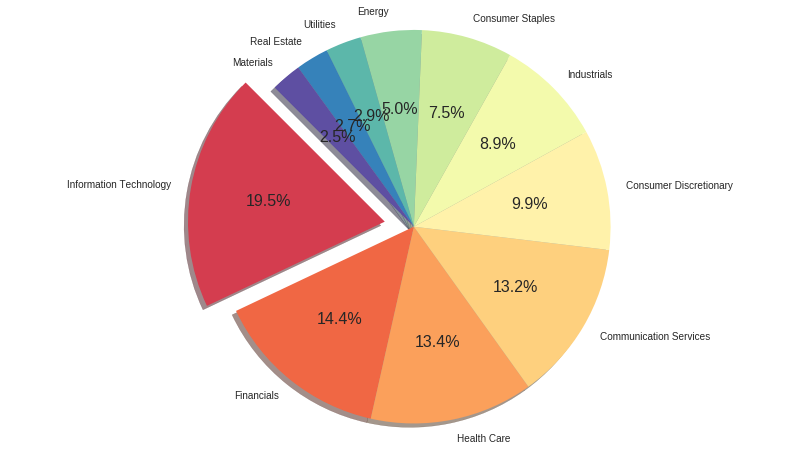

In [40]:
# sector_marcap 시가총액
values = sector_marcap.values
labels = sector_marcap.index

n = len(labels)

plt.pie(values, labels=labels, colors=make_colors(n), explode=make_explode(n), autopct='%1.1f%%', shadow=True, startangle=135)
plt.axis('equal')
plt.show()

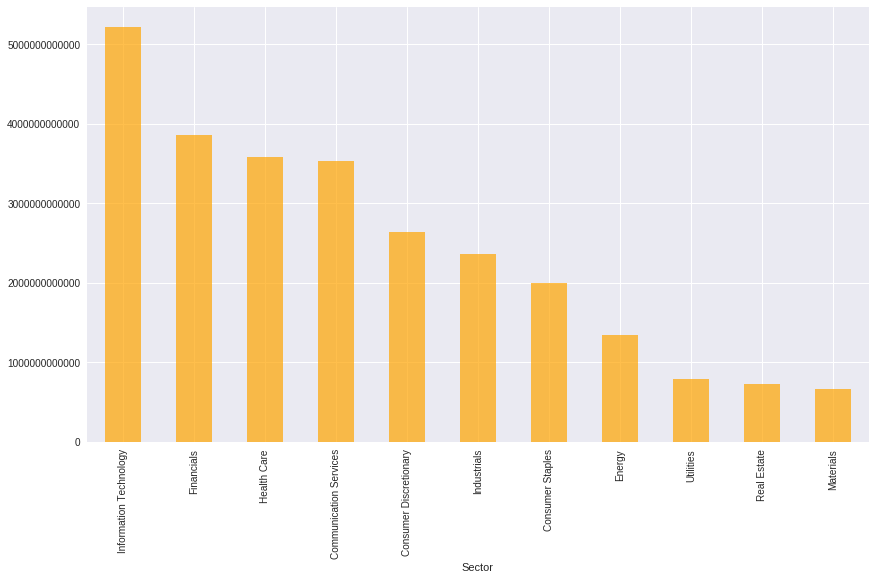

In [41]:
_ = sector_marcap.plot(kind='bar', color='orange', alpha=0.7)

# 섹터별 팩터 분석

In [42]:
sp500.groupby('Sector').describe()['PER'].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Sector,,,,,,,,
Consumer Discretionary,59.00,206.37,1409.70,6.53,13.05,19.56,24.12,10850.00
Health Care,55.00,68.62,231.75,9.27,18.70,31.45,48.61,1742.99
Real Estate,31.00,64.36,101.03,11.59,27.59,40.92,64.25,588.80
Information Technology,65.00,43.77,59.38,3.66,17.97,27.02,42.35,424.66
Communication Services,23.00,27.80,29.96,5.22,11.89,20.97,29.73,144.23
Energy,23.00,24.07,27.03,8.23,12.24,16.36,26.02,140.20
Utilities,26.00,23.94,6.89,11.86,20.61,22.81,25.65,41.60
Materials,26.00,22.88,11.92,7.35,12.62,22.21,29.81,56.09
Consumer Staples,30.00,22.62,8.56,7.26,14.89,22.23,28.85,43.99


In [43]:
sp500[sp500['Sector']=='Consumer Discretionary'].sort_values(by='PER', ascending=False)[:10]

,Symbol,Name,Sector,Industry,MarCap,Dividend,PER,PBR,Beta,ROE
457,UAA,Under Armour Class A,Consumer Discretionary,"Apparel, Accessories & Luxury Goods",9260000000.00,nan,10850.00,4.80,0.43,-2.30
109,CMG,Chipotle Mexican Grill,Consumer Discretionary,Restaurants,18650000000.00,nan,110.20,12.91,0.65,12.50
28,AMZN,Amazon.com Inc.,Consumer Discretionary,Internet & Direct Marketing Retail,879980000000.00,nan,91.72,20.47,1.63,27.00
496,WYNN,Wynn Resorts Ltd,Consumer Discretionary,Casinos & Gaming,13020000000.00,2.48,77.26,6.41,1.68,36.60
185,EXPE,Expedia Group,Consumer Discretionary,Internet & Direct Marketing Retail,18150000000.00,1.03,46.94,4.49,0.95,9.80
228,HAS,Hasbro Inc.,Consumer Discretionary,Leisure Products,10670000000.00,3.20,41.71,6.13,0.90,12.60
345,NKE,Nike,Consumer Discretionary,"Apparel, Accessories & Luxury Goods",138620000000.00,1.00,34.25,15.94,0.67,23.10
319,MGM,MGM Resorts International,Consumer Discretionary,Casinos & Gaming,14680000000.00,1.93,33.84,2.18,1.41,6.50
236,HLT,Hilton Worldwide Holdings Inc,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",24900000000.00,0.70,33.59,45.63,1.17,89.30
423,SBUX,Starbucks Corp.,Consumer Discretionary,Restaurants,89950000000.00,1.99,31.82,nan,0.49,173.40


Outlier : UAA(언더 아머) - 스포츠 용품 브랜드, 기어라는 기능성 소재로 유명

In [44]:
sp500.groupby('Sector').describe()['PBR'].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Sector,,,,,,,,
Industrials,67.00,15.71,76.84,1.56,2.81,4.45,6.50,631.69
Consumer Discretionary,58.00,10.21,24.10,0.96,2.19,4.18,6.88,163.77
Information Technology,61.00,8.05,5.98,1.23,3.64,6.57,11.79,24.68
Consumer Staples,29.00,6.96,6.27,0.61,2.35,4.83,8.97,27.30
Health Care,59.00,6.17,5.53,0.79,2.67,4.28,7.43,30.88
Financials,68.00,4.87,14.24,0.00,1.09,1.52,2.24,83.24
Communication Services,26.00,4.39,5.82,0.65,1.85,3.25,4.88,31.49
Real Estate,30.00,4.09,3.67,1.34,2.10,2.79,4.48,16.94
Materials,25.00,3.76,2.66,0.84,1.91,2.98,4.52,10.76


In [45]:
sp500.groupby('Sector').describe()['ROE'].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Sector,,,,,,,,
Consumer Discretionary,63.00,45.42,133.93,-100.30,12.35,22.80,34.75,805.30
Industrials,68.00,33.48,101.17,-215.10,13.02,24.55,32.02,785.10
Financials,66.00,28.94,69.19,0.00,9.40,12.00,15.93,402.10
Communication Services,22.00,22.64,21.35,-13.90,12.47,20.10,27.58,82.80
Information Technology,64.00,20.38,58.13,-274.60,9.33,23.05,41.78,172.20
Materials,26.00,16.66,18.06,-50.10,8.88,17.30,27.25,45.40
Health Care,60.00,14.99,37.30,-202.20,5.70,15.40,25.50,92.60
Real Estate,31.00,12.49,14.33,-1.60,4.65,8.00,16.25,72.80
Energy,28.00,11.22,10.95,-15.50,3.43,11.00,18.75,34.90


In [46]:
sp500.groupby('Sector').describe()['Beta'].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Sector,,,,,,,,
Energy,28.00,1.28,0.42,0.61,0.98,1.21,1.40,2.27
Materials,24.00,1.25,0.46,0.03,0.91,1.23,1.54,2.27
Information Technology,66.00,1.22,0.43,0.54,0.97,1.17,1.39,3.39
Industrials,69.00,1.19,0.31,0.47,1.01,1.19,1.35,2.51
Financials,67.00,1.17,0.35,0.32,0.97,1.15,1.42,2.03
Health Care,62.00,1.10,0.40,0.32,0.89,1.10,1.24,3.08
Communication Services,22.00,1.06,0.33,0.49,0.84,1.06,1.36,1.59
Consumer Discretionary,63.00,1.00,0.41,0.11,0.68,1.01,1.26,1.90
Real Estate,31.00,0.71,0.33,0.19,0.49,0.63,0.89,1.72


In [47]:
sp500.groupby('Sector').describe()['Dividend'].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Sector,,,,,,,,
Real Estate,29.00,3.75,1.24,1.85,2.89,3.56,4.18,6.93
Utilities,28.00,3.16,0.93,0.28,2.86,3.07,3.71,5.11
Communication Services,14.00,2.91,2.26,0.76,1.56,1.86,3.97,8.26
Consumer Staples,32.00,2.79,1.18,0.95,2.08,2.65,3.42,5.62
Consumer Discretionary,50.00,2.72,1.78,0.14,1.49,2.49,3.48,9.56
Energy,29.00,2.57,1.55,0.33,1.13,2.52,3.92,5.25
Financials,66.00,2.46,1.12,0.52,1.66,2.50,3.08,6.06
Materials,26.00,2.29,1.29,0.35,1.44,2.03,2.87,5.19
Information Technology,44.00,2.14,1.15,0.03,1.35,1.99,2.81,5.14
